# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [17]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


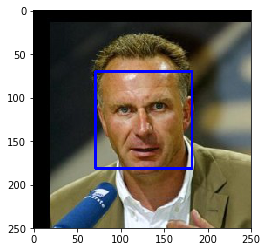

In [18]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[1050])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [19]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [20]:
from tqdm import tqdm
import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

detected_human_humanfiles= [int(face_detector(i)) for i in tqdm.tqdm_notebook(human_files_short, desc='human_files')]
pdhh = np.sum(detected_human_humanfiles)

detected_human_dogfiles= [int(face_detector(i)) for i in tqdm.tqdm_notebook(dog_files_short, desc='dog_files')]
pdhd = np.sum(detected_human_dogfiles)
    

print(f'percentage of detected human face in human_files: {pdhh}%')
print(f'percentage of detected human face in dog_files: {pdhd}%')

HBox(children=(IntProgress(value=0, description='human_files: '), HTML(value='')))

HBox(children=(IntProgress(value=0, description='dog_files: '), HTML(value='')))


percentage of detected human face in human_files: 98%
percentage of detected human face in dog_files: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [21]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 85046679.58it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [22]:
from PIL import Image
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VGG16.to(device)
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)#.convert('RGB')


    transform = transforms.Compose([transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    im = transform(img).unsqueeze(0).to(device)
    
    p_class = VGG16(im)
    
    return torch.exp(p_class).argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [23]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    
        
    return 151<= pred.item()<=268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [41]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
detected_dog_humanfiles= [int(dog_detector(i)) for i in human_files_short]
pdhh = np.sum(detected_dog_humanfiles)

detected_dog_dogfiles= [int(dog_detector(i)) for i in dog_files_short]
pdhd = np.sum(detected_dog_dogfiles)
    

print(f'percentage of detected dog in human_files: {pdhh}%')
print(f'percentage of detected dog in dog_files: {pdhd}%')

percentage of detected dog in human_files: 2%
percentage of detected dog in dog_files: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [42]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [32]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

transform = transforms.Compose([transforms.RandomHorizontalFlip(.25), transforms.RandomVerticalFlip(.25), #transforms.RandomAffine(10),
                                transforms.RandomRotation(degrees=15),
                                transforms.Resize((224, 224)), transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])


train_files = os.path.join('/data/dog_images/train')
valid_files = os.path.join('/data/dog_images/valid')
test_files = os.path.join('/data/dog_images/test')
# dog_files_short
train_data = datasets.ImageFolder(train_files, transform = transform )
valid_data = datasets.ImageFolder(valid_files, transform = test_transform )
test_data = datasets.ImageFolder(test_files, transform = test_transform )

loaders_scratch={}
loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=16, shuffle=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True)


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

By searching through well-known models, I have chosen 224 as the resize value which is a common value among those models.

I have also added random flips both vertical and horizontal, and random rotation which showed a great improvement in the model accuracy. 
Regarding the batch size, it’s recommended to select a value that is power of 2 and also not large as the model could not generalize. Therefore, 32 was picked as the bathc  size for training  and 16 for test and accuracy.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [34]:
import torch.nn as nn
import torch.nn.functional as F
use_cuda=torch.cuda.is_available()
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.conv1_2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.conv2_2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.conv3_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)
        
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(14*14*128, 7*7*128)
        self.fc2 = nn.Linear(7*7*128, 7*7*16)
        self.fc3 = nn.Linear(7*7*16, 133)
        
        self.drop = nn.Dropout(.25)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.batchnorm1( self.conv1(x) ) )
#         out = F.relu(self.batchnorm1( self.conv1_2(x) ) )
#         x =F.relu( x + self.batchnorm1( self.conv1_2(out) ) )
#         x = F.relu(self.conv1_2(x))
        x = self.pool(x)
        
        x = F.relu(self.batchnorm2( self.conv2(x) ) )
#         out = F.relu(self.batchnorm2( self.conv2_2(x) ) )
#         x = F.relu( x + self.batchnorm2( self.conv2_2(out) ) )
#         x = F.relu(self.conv2_2(x))
        x = self.pool(x)
        
        x = F.relu( self.batchnorm3( self.conv3(x) ) )
#         out = F.relu( self.batchnorm3( self.conv3_2(x) ) )
#         x = F.relu( x + self.batchnorm3( self.conv3_2(out) ) )
#         x = F.relu(self.conv3_2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        x = x.view(-1, 14*14*128)
        x = self.drop(F.relu(self.fc1(x)))
        x = self.drop(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

#instantiate the CNN
model_scratch = Net()

#move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

1) I had initially started with only convolutional layers and was limited to maximum 64 channels since greater values would pop memory error. However, the best accuracy I achieved was about 2%. This increased to 5% by implementing image augmentation. Furthermore, I attempted to eliminate maxpooling layers and instead use additional convolutional layers that would half the spatial size of the image (kernel_size=4, stride=2, padding=1). However, the model diverged. 

2) I mixed up skip-connections and batch normalization methods and increased my accuracy to 9%. 

3) Interestingly, by removing the skip connections and only using batch normalizations after each convolutional layers, I was able to increase the channels up to 128 and achieve 16% accuracy. It is believed using larger channels may further improve the accuracy.

Thereby, the architecture of the final model is as follows:
- 4 convolutional layers: the output channel doubles consecutively after each layer, starting form 16 to 128.
- 3 batch normalization layers each of which is applied to the output of the convolutional layer except for the last convolutional layer.
- 4 maxpooling layers after each convolutional layer
- 3 fully connected layers to flatten data and obtain 133 nodes as the classes of the dog breeds. Dropout layers are added after the first and second fully connected later with the probability of 0.25 to avoid overfitting and better generalizing the model.
- I used relu as the activation function for each layer


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [36]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

#### Please Note: (I have changed the following code a bit!)
In order to save the limited GPU hours in the workspace, I have added **early_stop** parameter to the “train” function which would terminate the loop if the validation loss is rising continuously. This parameter receives a value between 0 and 1 which is the ratio of the amount of the validation loss increase to the minimum recorded validation loss. If the validation loss becomes greater than (1 + early_stop)* valid_loss_min for **3 consecutive** iteration, the training loop would break.

This parameter is set to a value of 0.1 (10%) for our model (below) and 0.03 (3%) for the transfer learning model which is presented later on.

In [37]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# import tqdm.tqdm_notebook as tqdm2
from workspace_utils import active_session


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, early_stop=.1):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    #     use_cuda=False
    use_cuda=torch.cuda.is_available()

    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        print('---------------------------\nTRAINING PHASE EPOCH %s:'%epoch)
        model.train()
    #         with tqdm(total = len(loaders['train'])) as pbar:
        for batch_idx, (data, target) in tqdm.tqdm_notebook(enumerate(loaders['train']), total=len(loaders['train'])):
    #         for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            pred = model.forward(data)
            loss = criterion(pred, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
    #             pbar.update(1)

        ######################    
        # validate the model #
        ######################
        print('VALIDATING PHASE EPOCH %s:'%epoch)
        model.eval()
        for batch_idx, (data, target) in tqdm.tqdm_notebook(enumerate(loaders['valid']), total=len(loaders['valid'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            valid_pred = model.forward(data)
            loss_valid = criterion(valid_pred, target)

            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss_valid.data - valid_loss))


        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            delta = valid_loss_min-valid_loss
            print('#########################\nValidation loss decreased by %.6f (%.3f)%% Saving model....\n#########################'%(delta, delta/valid_loss_min*100))
            torch.save(model.state_dict(), save_path)

            valid_loss_min = valid_loss
            terminate = 0

        elif valid_loss >= (1+early_stop)*valid_loss_min:
            terminate +=1

        else:
            terminate =0

        if terminate == 3:
            print('it is diverging...')
            break
    # return trained model
    return model


    # train the model
with active_session():
    model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                          criterion_scratch, use_cuda, 'model_scratch.pt')

    # load the model that got the best validation accuracy
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))

---------------------------
TRAINING PHASE EPOCH 1:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 1:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 1 	Training Loss: 4.883732 	Validation Loss: 4.867154
#########################
Validation loss decreased by inf (nan)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 2:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 2:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 2 	Training Loss: 4.864172 	Validation Loss: 4.848386
#########################
Validation loss decreased by 0.018768 (0.386)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 3:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 3:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 3 	Training Loss: 4.836997 	Validation Loss: 4.808833
#########################
Validation loss decreased by 0.039554 (0.816)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 4:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 4:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 4 	Training Loss: 4.755889 	Validation Loss: 4.673855
#########################
Validation loss decreased by 0.134978 (2.807)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 5:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 5:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 5 	Training Loss: 4.566102 	Validation Loss: 4.463089
#########################
Validation loss decreased by 0.210766 (4.509)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 6:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 6:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 6 	Training Loss: 4.398336 	Validation Loss: 4.348257
#########################
Validation loss decreased by 0.114832 (2.573)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 7:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 7:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 7 	Training Loss: 4.295670 	Validation Loss: 4.277241
#########################
Validation loss decreased by 0.071016 (1.633)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 8:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 8:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 8 	Training Loss: 4.223442 	Validation Loss: 4.313686
---------------------------
TRAINING PHASE EPOCH 9:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 9:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 9 	Training Loss: 4.133170 	Validation Loss: 4.181956
#########################
Validation loss decreased by 0.095285 (2.228)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 10:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 10:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 10 	Training Loss: 4.070852 	Validation Loss: 4.130912
#########################
Validation loss decreased by 0.051044 (1.221)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 11:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 11:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 11 	Training Loss: 4.013486 	Validation Loss: 4.056706
#########################
Validation loss decreased by 0.074206 (1.796)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 12:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 12:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 12 	Training Loss: 3.950057 	Validation Loss: 3.994806
#########################
Validation loss decreased by 0.061900 (1.526)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 13:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 13:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 13 	Training Loss: 3.884243 	Validation Loss: 3.959932
#########################
Validation loss decreased by 0.034874 (0.873)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 14:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 14:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 14 	Training Loss: 3.821838 	Validation Loss: 3.921443
#########################
Validation loss decreased by 0.038488 (0.972)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 15:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 15:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 15 	Training Loss: 3.751527 	Validation Loss: 3.910873
#########################
Validation loss decreased by 0.010570 (0.270)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 16:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 16:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 16 	Training Loss: 3.702223 	Validation Loss: 3.785464
#########################
Validation loss decreased by 0.125409 (3.207)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 17:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 17:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 17 	Training Loss: 3.653432 	Validation Loss: 3.880006
---------------------------
TRAINING PHASE EPOCH 18:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 18:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 18 	Training Loss: 3.593914 	Validation Loss: 3.767406
#########################
Validation loss decreased by 0.018058 (0.477)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 19:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 19:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 19 	Training Loss: 3.518779 	Validation Loss: 3.809593
---------------------------
TRAINING PHASE EPOCH 20:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 20:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 20 	Training Loss: 3.481967 	Validation Loss: 3.856710
---------------------------
TRAINING PHASE EPOCH 21:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 21:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 21 	Training Loss: 3.432798 	Validation Loss: 3.823397
---------------------------
TRAINING PHASE EPOCH 22:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 22:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 22 	Training Loss: 3.371068 	Validation Loss: 3.739996
#########################
Validation loss decreased by 0.027410 (0.728)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 23:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 23:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 23 	Training Loss: 3.319030 	Validation Loss: 3.772847
---------------------------
TRAINING PHASE EPOCH 24:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 24:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 24 	Training Loss: 3.274570 	Validation Loss: 3.660066
#########################
Validation loss decreased by 0.079931 (2.137)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 25:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 25:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 25 	Training Loss: 3.218567 	Validation Loss: 3.699013
---------------------------
TRAINING PHASE EPOCH 26:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 26:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 26 	Training Loss: 3.163220 	Validation Loss: 3.657430
#########################
Validation loss decreased by 0.002636 (0.072)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 27:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 27:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 27 	Training Loss: 3.099102 	Validation Loss: 3.644914
#########################
Validation loss decreased by 0.012516 (0.342)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 28:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 28:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 28 	Training Loss: 3.050216 	Validation Loss: 3.669516
---------------------------
TRAINING PHASE EPOCH 29:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 29:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 29 	Training Loss: 3.001363 	Validation Loss: 3.685847
---------------------------
TRAINING PHASE EPOCH 30:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 30:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 30 	Training Loss: 2.918914 	Validation Loss: 3.662736
---------------------------
TRAINING PHASE EPOCH 31:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 31:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 31 	Training Loss: 2.840397 	Validation Loss: 3.793799
---------------------------
TRAINING PHASE EPOCH 32:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 32:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 32 	Training Loss: 2.798617 	Validation Loss: 3.585262
#########################
Validation loss decreased by 0.059652 (1.637)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 33:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 33:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 33 	Training Loss: 2.711726 	Validation Loss: 3.681808
---------------------------
TRAINING PHASE EPOCH 34:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 34:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 34 	Training Loss: 2.621574 	Validation Loss: 3.622381
---------------------------
TRAINING PHASE EPOCH 35:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 35:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 35 	Training Loss: 2.571777 	Validation Loss: 3.652995
---------------------------
TRAINING PHASE EPOCH 36:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 36:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 36 	Training Loss: 2.493382 	Validation Loss: 3.701152
---------------------------
TRAINING PHASE EPOCH 37:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 37:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 37 	Training Loss: 2.439123 	Validation Loss: 3.637212
---------------------------
TRAINING PHASE EPOCH 38:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 38:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 38 	Training Loss: 2.345500 	Validation Loss: 3.670091
---------------------------
TRAINING PHASE EPOCH 39:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 39:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 39 	Training Loss: 2.247228 	Validation Loss: 3.713696
---------------------------
TRAINING PHASE EPOCH 40:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 40:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 40 	Training Loss: 2.193161 	Validation Loss: 3.815023
---------------------------
TRAINING PHASE EPOCH 41:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 41:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 41 	Training Loss: 2.124822 	Validation Loss: 3.674823
---------------------------
TRAINING PHASE EPOCH 42:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 42:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 42 	Training Loss: 2.038015 	Validation Loss: 3.915334
---------------------------
TRAINING PHASE EPOCH 43:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 43:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 43 	Training Loss: 1.975496 	Validation Loss: 3.843091
---------------------------
TRAINING PHASE EPOCH 44:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 44:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 44 	Training Loss: 1.877267 	Validation Loss: 3.852946
---------------------------
TRAINING PHASE EPOCH 45:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 45:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 45 	Training Loss: 1.813579 	Validation Loss: 3.854460
---------------------------
TRAINING PHASE EPOCH 46:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 46:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 46 	Training Loss: 1.770593 	Validation Loss: 3.763851
---------------------------
TRAINING PHASE EPOCH 47:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 47:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 47 	Training Loss: 1.651174 	Validation Loss: 4.047306
---------------------------
TRAINING PHASE EPOCH 48:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 48:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 48 	Training Loss: 1.594624 	Validation Loss: 4.043809
---------------------------
TRAINING PHASE EPOCH 49:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 49:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 49 	Training Loss: 1.509366 	Validation Loss: 3.918041
---------------------------
TRAINING PHASE EPOCH 50:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 50:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 50 	Training Loss: 1.483629 	Validation Loss: 4.230816
---------------------------
TRAINING PHASE EPOCH 51:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 51:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 51 	Training Loss: 1.405074 	Validation Loss: 4.120671
---------------------------
TRAINING PHASE EPOCH 52:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 52:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 52 	Training Loss: 1.350476 	Validation Loss: 4.106722
it is diverging...


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in tqdm.tqdm_notebook(enumerate(loaders['test']), total=len(loaders['test'])):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [13]:
## TODO: Specify data loaders
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

os.listdir(os.path.join(os.getcwd(), '..','/data/dog_images'))
train_files = os.path.join(os.getcwd(), '..','/data/dog_images/train')
valid_files = os.path.join(os.getcwd(), '..','/data/dog_images/valid')
test_files = os.path.join(os.getcwd(), '..','/data/dog_images/test')
# dog_files_short
train_data = datasets.ImageFolder(train_files, transform = transform )
valid_data = datasets.ImageFolder(valid_files, transform = transform )
test_data = datasets.ImageFolder(test_files, transform = transform )

loaders_transfer={}
loaders_transfer['train'] = torch.utils.data.DataLoader(train_data, batch_size=32,shuffle=True)
loaders_transfer['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=16, shuffle=True)
loaders_transfer['test'] = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True)


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [5]:
import torchvision.models as models
import torch.nn as nn
from collections import OrderedDict
import torch

## TODO: Specify model architecture

model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.conv1.parameters():
    param.requires_grad = False
for param in model_transfer.bn1.parameters():
    param.requires_grad = False

    
for param in model_transfer.layer1.parameters():
    param.requires_grad = False
for param in model_transfer.layer2.parameters():
    param.requires_grad = False
for param in model_transfer.layer3.parameters():
    param.requires_grad = False
for param in model_transfer.layer4.parameters():
    param.requires_grad = False


# avgpool = model_transfer.avgpool
fc = model_transfer.fc
fc_out_features = model_transfer.fc.out_features
fc_in_features = model_transfer.fc.in_features
# del model_transfer.avgpool
del model_transfer.fc
    
model_transfer.add_module('fc', nn.Sequential(OrderedDict([('fc1', nn.Linear(fc_in_features, fc_out_features)),
                                                                   ('drop1', nn.Dropout(.25)),
                          ('fc2', nn.Linear(fc_out_features, 500)),
                          ('drop2', nn.Dropout(.25)),
                         ('fc3', nn.Linear(500, 133))]) ) )
    
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()

In [39]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I mainly would like to try a different model and chose resnet50 that has a good accuracy. First I printed out the model to get familiar with the architecture. Identifying the classifier layer, all the former layers were set constant. 

The last fully connected layer was then modified to encompass 3 fully connected layers with 2 Dropout layers (p = 0.25) in middle to better generalize the model


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [15]:
criterion_transfer = nn.CrossEntropyLoss()
params = list(model_transfer.avgpool.parameters()) + list(model_transfer.fc.parameters())
optimizer_transfer = torch.optim.SGD(params, lr=.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [53]:
# train the model
from workspace_utils import active_session
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
n_epochs=100

with active_session():
    model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer,
                           criterion_transfer, use_cuda, 'model_transfer.pt', early_stop=.03)

    # load the model that got the best validation accuracy (uncomment the line below)
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))

---------------------------
TRAINING PHASE EPOCH 1:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 1:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 1 	Training Loss: 4.710186 	Validation Loss: 4.471334
#########################
Validation loss decreased by inf (nan)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 2:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))

VALIDATING PHASE EPOCH 2:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))

Epoch: 2 	Training Loss: 4.213846 	Validation Loss: 3.768338
#########################
Validation loss decreased by 0.702997 (15.722)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 3:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))



VALIDATING PHASE EPOCH 3:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 3 	Training Loss: 3.320573 	Validation Loss: 2.673642
#########################
Validation loss decreased by 1.094696 (29.050)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 4:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 4:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 4 	Training Loss: 2.282670 	Validation Loss: 1.736899
#########################
Validation loss decreased by 0.936743 (35.036)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 5:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 5:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 5 	Training Loss: 1.600037 	Validation Loss: 1.245148
#########################
Validation loss decreased by 0.491751 (28.312)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 6:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 6:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 6 	Training Loss: 1.203918 	Validation Loss: 0.972790
#########################
Validation loss decreased by 0.272358 (21.874)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 7:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 7:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 7 	Training Loss: 1.006642 	Validation Loss: 0.832248
#########################
Validation loss decreased by 0.140541 (14.447)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 8:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 8:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 8 	Training Loss: 0.870924 	Validation Loss: 0.734772
#########################
Validation loss decreased by 0.097476 (11.712)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 9:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 9:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 9 	Training Loss: 0.795650 	Validation Loss: 0.671612
#########################
Validation loss decreased by 0.063161 (8.596)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 10:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 10:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 10 	Training Loss: 0.728102 	Validation Loss: 0.635657
#########################
Validation loss decreased by 0.035955 (5.354)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 11:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 11:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 11 	Training Loss: 0.668788 	Validation Loss: 0.600521
#########################
Validation loss decreased by 0.035135 (5.527)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 12:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 12:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 12 	Training Loss: 0.631700 	Validation Loss: 0.582679
#########################
Validation loss decreased by 0.017843 (2.971)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 13:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 13:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 13 	Training Loss: 0.591131 	Validation Loss: 0.563467
#########################
Validation loss decreased by 0.019212 (3.297)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 14:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 14:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 14 	Training Loss: 0.569763 	Validation Loss: 0.545339
#########################
Validation loss decreased by 0.018128 (3.217)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 15:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 15:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 15 	Training Loss: 0.556335 	Validation Loss: 0.528542
#########################
Validation loss decreased by 0.016797 (3.080)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 16:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 16:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 16 	Training Loss: 0.528122 	Validation Loss: 0.520041
#########################
Validation loss decreased by 0.008501 (1.608)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 17:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 17:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 17 	Training Loss: 0.505634 	Validation Loss: 0.517224
#########################
Validation loss decreased by 0.002817 (0.542)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 18:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 18:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 18 	Training Loss: 0.495049 	Validation Loss: 0.501559
#########################
Validation loss decreased by 0.015666 (3.029)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 19:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 19:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 19 	Training Loss: 0.470890 	Validation Loss: 0.485691
#########################
Validation loss decreased by 0.015868 (3.164)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 20:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 20:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 20 	Training Loss: 0.472241 	Validation Loss: 0.478384
#########################
Validation loss decreased by 0.007307 (1.504)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 21:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 21:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 21 	Training Loss: 0.456355 	Validation Loss: 0.485370
---------------------------
TRAINING PHASE EPOCH 22:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 22:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 22 	Training Loss: 0.440645 	Validation Loss: 0.475290
#########################
Validation loss decreased by 0.003094 (0.647)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 23:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 23:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 23 	Training Loss: 0.429037 	Validation Loss: 0.474553
#########################
Validation loss decreased by 0.000737 (0.155)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 24:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 24:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 24 	Training Loss: 0.407144 	Validation Loss: 0.524893
---------------------------
TRAINING PHASE EPOCH 25:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 25:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 25 	Training Loss: 0.398389 	Validation Loss: 0.471068
#########################
Validation loss decreased by 0.003485 (0.734)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 26:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 26:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 26 	Training Loss: 0.391374 	Validation Loss: 0.487921
---------------------------
TRAINING PHASE EPOCH 27:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 27:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 27 	Training Loss: 0.389471 	Validation Loss: 0.470072
#########################
Validation loss decreased by 0.000996 (0.211)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 28:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 28:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 28 	Training Loss: 0.386780 	Validation Loss: 0.467767
#########################
Validation loss decreased by 0.002305 (0.490)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 29:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 29:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 29 	Training Loss: 0.374705 	Validation Loss: 0.476877
---------------------------
TRAINING PHASE EPOCH 30:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 30:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 30 	Training Loss: 0.363267 	Validation Loss: 0.453172
#########################
Validation loss decreased by 0.014595 (3.120)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 31:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 31:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 31 	Training Loss: 0.356428 	Validation Loss: 0.468651
---------------------------
TRAINING PHASE EPOCH 32:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 32:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 32 	Training Loss: 0.352285 	Validation Loss: 0.462661
---------------------------
TRAINING PHASE EPOCH 33:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 33:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 33 	Training Loss: 0.336355 	Validation Loss: 0.485755
---------------------------
TRAINING PHASE EPOCH 34:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 34:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 34 	Training Loss: 0.341605 	Validation Loss: 0.439980
#########################
Validation loss decreased by 0.013192 (2.911)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 35:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 35:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 35 	Training Loss: 0.335291 	Validation Loss: 0.445620
---------------------------
TRAINING PHASE EPOCH 36:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 36:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 36 	Training Loss: 0.325187 	Validation Loss: 0.455643
---------------------------
TRAINING PHASE EPOCH 37:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 37:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 37 	Training Loss: 0.307061 	Validation Loss: 0.449724
---------------------------
TRAINING PHASE EPOCH 38:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 38:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 38 	Training Loss: 0.312839 	Validation Loss: 0.443037
---------------------------
TRAINING PHASE EPOCH 39:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 39:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 39 	Training Loss: 0.298904 	Validation Loss: 0.450957
---------------------------
TRAINING PHASE EPOCH 40:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 40:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 40 	Training Loss: 0.300855 	Validation Loss: 0.448571
---------------------------
TRAINING PHASE EPOCH 41:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 41:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 41 	Training Loss: 0.303088 	Validation Loss: 0.428261
#########################
Validation loss decreased by 0.011718 (2.663)% Saving model....
#########################
---------------------------
TRAINING PHASE EPOCH 42:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 42:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 42 	Training Loss: 0.290786 	Validation Loss: 0.449272
---------------------------
TRAINING PHASE EPOCH 43:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 43:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 43 	Training Loss: 0.290656 	Validation Loss: 0.445584
---------------------------
TRAINING PHASE EPOCH 44:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 44:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 44 	Training Loss: 0.285594 	Validation Loss: 0.434096
---------------------------
TRAINING PHASE EPOCH 45:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 45:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 45 	Training Loss: 0.271586 	Validation Loss: 0.444740
---------------------------
TRAINING PHASE EPOCH 46:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 46:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 46 	Training Loss: 0.276336 	Validation Loss: 0.459936
---------------------------
TRAINING PHASE EPOCH 47:


HBox(children=(IntProgress(value=0, max=209), HTML(value='')))


VALIDATING PHASE EPOCH 47:


HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Epoch: 47 	Training Loss: 0.261566 	Validation Loss: 0.451931
it is diverging...


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [24]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

HBox(children=(IntProgress(value=0, max=53), HTML(value='')))


Test Loss: 0.431856


Test Accuracy: 85% (712/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [25]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import torch.nn.functional as F
# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
dog_classes = {v:k.split('.')[1] for k,v in train_data.class_to_idx.items()}


# model_transfer.load_state_dict(torch.load('model_transfer.pt'))

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    image = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    
    img = transform(image).unsqueeze(0).to(device)
    
    model_transfer.to(device)
    pred = model_transfer(img)
    
    prob_pred = F.softmax(pred, dim=1)
    
    _, idx = torch.topk(pred,1)

    breed = (dog_classes[idx.squeeze(0).item()])
     
    return breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [26]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import re
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
   
    if dog_detector(img_path):
        name_code = img_path.split('/')[-1].split('.')[0]
        name = re.findall('(\D*)_\d', name_code)[0]
        
        pred_similar = predict_breed_transfer(img_path)
        
        prediction = f'good boy! lemme guess...\nyou are a {pred_similar}'
        actual_bread = f'Real Bread: ->>({name})<<-'
        
    elif face_detector(img_path):
        pred_similar = predict_breed_transfer(img_path)
        
        prediction = f'gotcha human!\nyou look like a {pred_similar}'
        actual_bread = 'human'
                        
    else:
        prediction = '404! what the heck are you!!??'
        actual_bread = 'NA'
    
    return prediction, actual_bread
        


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)


1)	Using a better face detector algorithm

2)	Improving current classifier model by adding more complex layers

3)	Trying other pretrained models that may show a better accuracy


**NB**: In order to ensure and verify the predicted breed is correct, the real breed is also printed as the caption at the bottom of the dog picture. This real label is extracted from the name of the dog image file. 


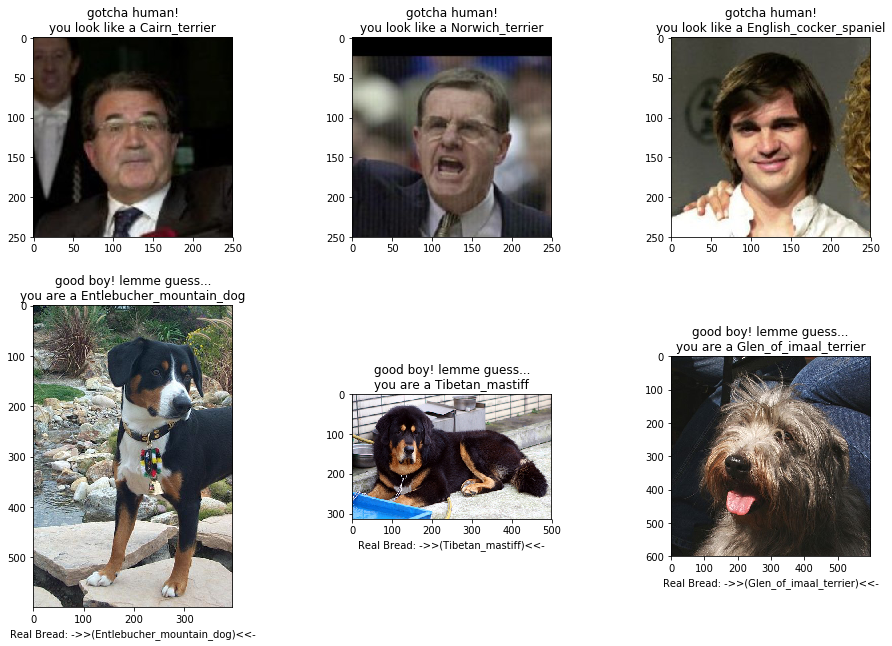

In [38]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
plt.figure(figsize=(15, 45))

# selecting 3 radom samples from each human and dog dataset:
rand_dog_files = np.random.choice(dog_files, 3, replace=False)
rand_human_files = np.random.choice(human_files, 3, replace=False)


# for i,file in enumerate( np.hstack((human_files[i:i+3], dog_files[i:i+3])) ):
for i,file in enumerate( np.hstack((rand_human_files, rand_dog_files) ) ):
#     run_app(file)
    pred, real = run_app(file)
    img = Image.open(file)
#     ax = fig.add_subplot(2, 3, i, xticks=[], yticks=[], squeeze=True)
    plt.subplot(2, 3, i+1)
    plt.axis(y='off')
    plt.imshow(img)#, aspect='auto')
    i+=1
    plt.title(pred)
    if real is not 'human' and 'NA':
        plt.xlabel(real)
plt.subplots_adjust(hspace=-.85, wspace=.6)
plt.show()